In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
import os, shutil

In [2]:
original_dataset_dir = "C:/Users/Desktop/Assignment/rose_and_sunflower"

In [3]:
base_dir =  "C:/Users/Desktop/Assignment/rose_and_sunflower/classification_rose_vs_sunflower_using_ann"
os.mkdir(base_dir)

In [4]:
# Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
# Directory with training rose pictures

train_rose_dir = os.path.join(train_dir, 'rose')
os.mkdir(train_rose_dir)

In [6]:
# Directory with training sunflower pictures

train_sunflower_dir = os.path.join(train_dir, 'sunflower')
os.mkdir(train_sunflower_dir)

In [7]:
# Directory with validation rose pictures

validation_rose_dir = os.path.join(validation_dir, 'rose')
os.mkdir(validation_rose_dir)

In [8]:
# Directory with validation sunflower pictures

validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
os.mkdir(validation_sunflower_dir)

In [9]:
# Directory with test rose pictures

test_rose_dir = os.path.join(test_dir, 'rose')
os.mkdir(test_rose_dir)

In [10]:
# Directory with test sunflower pictures

test_sunflower_dir = os.path.join(test_dir, 'sunflower')
os.mkdir(test_sunflower_dir)

In [11]:
# Copies the first 434 rose images to train_rose_dir

fnames = ['rose.{}.jpg'.format(i) for i in range(1,435)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_rose_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
# Copies the 175 rose images to validation_cats_dir
fnames = ['rose.{}.jpg'.format(i) for i in range(435, 610)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_rose_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
#  Copies the next 175 rose images to test_cats_dir

fnames = ['rose.{}.jpg'.format(i) for i in range(610, 785)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_rose_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Copies the first 432 sunflower images to train_sunflower_dir

fnames = ['sunflower.{}.jpg'.format(i) for i in range(1, 433)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_sunflower_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 150 sunflower images to validation_sunflower_dir    

fnames = ['sunflower.{}.jpg'.format(i) for i in range(433, 587)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_sunflower_dir, fname)
    shutil.copyfile(src, dst)
    
# Copies the next 150 sunflower images to test_sunflower_dir    

fnames = ['sunflower.{}.jpg'.format(i) for i in range(587, 733) ]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_sunflower_dir, fname)
    shutil.copyfile(src, dst)

In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 150, 150, 512)     2048      
_________________________________________________________________
flatten_3 (Flatten)          (None, 11520000)          0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11520001  
Total params: 11,522,049
Trainable params: 11,522,049
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
         target_size=(150, 150),
         batch_size=20,
         class_mode='binary')

Found 866 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


In [22]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 248s 2s/step - loss: 1.9250 - acc: 0.7717 - val_loss: 0.9812 - val_acc: 0.8538
Epoch 2/30
100/100 [==============================] - 223s 2s/step - loss: 1.0444 - acc: 0.8474 - val_loss: 0.7752 - val_acc: 0.8831
Epoch 3/30
100/100 [==============================] - 216s 2s/step - loss: 0.5343 - acc: 0.8963 - val_loss: 0.5074 - val_acc: 0.8335
Epoch 4/30
100/100 [==============================] - 209s 2s/step - loss: 0.4799 - acc: 0.9163 - val_loss: 0.0267 - val_acc: 0.8687
Epoch 5/30
100/100 [==============================] - 209s 2s/step - loss: 0.2741 - acc: 0.9448 - val_loss: 0.5557 - val_acc: 0.8687
Epoch 6/30
100/100 [==============================] - 211s 2s/step - loss: 0.1703 - acc: 0.9562 - val_loss: 1.0848 - val_acc: 0.8707
Epoch 7/30
100/100 [==============================] - 209s 2s/step - loss: 0.1274 - acc: 0.9719 - val_loss: 1.8093 - val_acc: 0.7963
Epoch 8/30
100/100 [==============================] - 208s 2s/step - 

In [23]:
# Saving the model

model.save('rose_vs_sunflower_using_ann.h5')

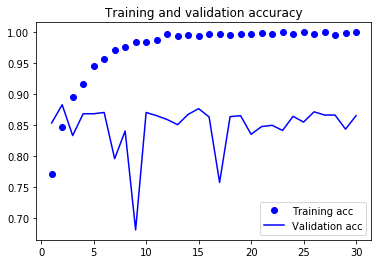

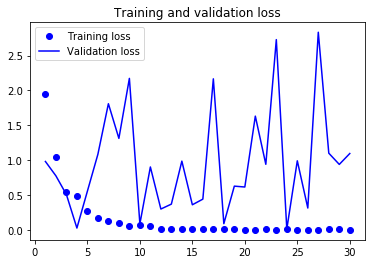

In [24]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()